**Section a**

Evaluate the Size of the Data and Check for Removed Features:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Heart_Disease_Dataset.csv")

# Check the size of the dataset
print("Number of rows and columns:", df.shape)

# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())


Number of rows and columns: (1190, 12)
Missing values per column:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Check the Balance of the Two Classes:



In [3]:
class_balance = df['target'].value_counts()
print("Class balance:\n", class_balance)


Class balance:
 1    629
0    561
Name: target, dtype: int64


Plot the Distribution of Age and Sex for Each Class:

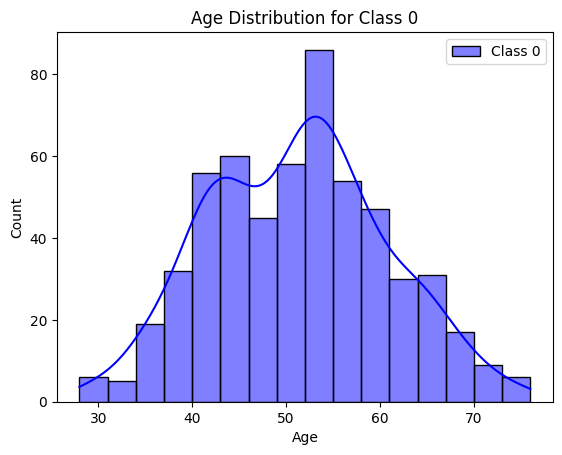

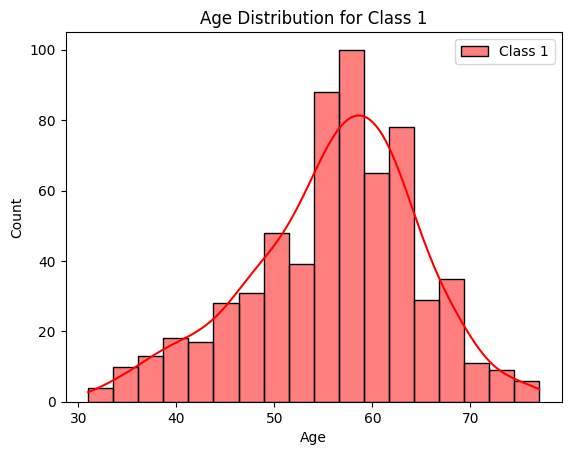

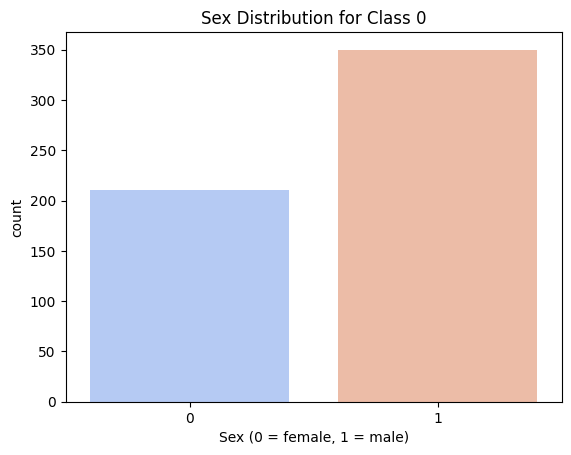

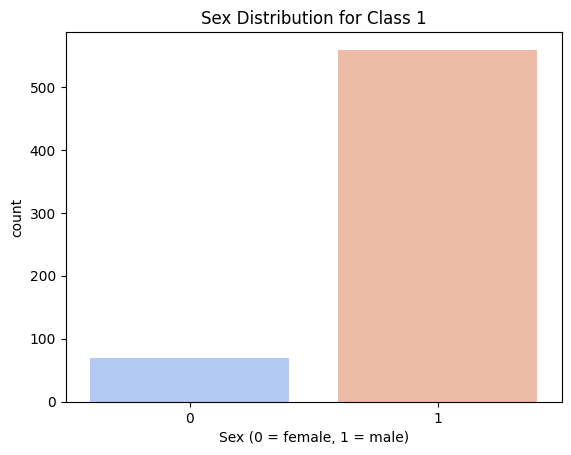

In [4]:
# Figure 1: Age distribution for class 0
sns.histplot(df[df['target'] == 0]['age'], kde=True, color='blue', label='Class 0')
plt.title('Age Distribution for Class 0')
plt.xlabel('Age')
plt.legend()
plt.show()

# Figure 2: Age distribution for class 1
sns.histplot(df[df['target'] == 1]['age'], kde=True, color='red', label='Class 1')
plt.title('Age Distribution for Class 1')
plt.xlabel('Age')
plt.legend()
plt.show()

# Figure 3: Sex distribution for class 0
sns.countplot(data=df[df['target'] == 0], x='sex', palette='coolwarm')
plt.title('Sex Distribution for Class 0')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.show()

# Figure 4: Sex distribution for class 1
sns.countplot(data=df[df['target'] == 1], x='sex', palette='coolwarm')
plt.title('Sex Distribution for Class 1')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.show()


**Section b**



In [5]:
# Select the numeric features (excluding the target variable)
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Calculate Z-scores for the selected features
z_scores = df[numeric_features].apply(lambda x: np.abs(stats.zscore(x)))

# Identify outliers based on the Z-test threshold of 3
outliers = df[(z_scores > 3).any(axis=1)]

# Remove outliers
df = df[(z_scores <= 3).all(axis=1)]

# Report the data points that are outliers
print("Outliers:")
print(outliers)

# Report the final size of the data after removing outliers
print("Final size of data after removing outliers:", df.shape)


Outliers:
      age  sex  chest pain type  resting bp s  cholesterol  \
30     53    1                3           145          518   
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
325    46    1                4           100            0   
366    64    0                4           200            0   
371    60    1                4           135            0   
391    51    1                4           140            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270  

Section C



In [9]:
# Select the numerical features for normalization
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected features
df[numeric_features] = scaler.fit_transform(df[numeric_features])


section D

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and test sets (70% for training, 30% for test)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = round(precision_score(y_test, y_pred) * 100, 2)
recall = round(recall_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred) * 100, 2)

# Report the results in percentage form
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")


Accuracy: 86.55 %
Precision: 88.18 %
Recall: 88.18 %
F1 Score: 88.18 %


In [12]:
# Initialize and train the SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = round(precision_score(y_test, y_pred) * 100, 2)
recall = round(recall_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred) * 100, 2)

# Report the results in percentage form
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")


Accuracy: 85.99 %
Precision: 87.32 %
Recall: 88.18 %
F1 Score: 87.75 %


In [16]:
# Initialize and train the SVM classifier with a polynomial kernel (you can set the degree parameter)
degree = 5  # Set the degree of the polynomial kernel
svm_classifier = SVC(kernel='poly', degree=degree)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = round(precision_score(y_test, y_pred) * 100, 2)
recall = round(recall_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred) * 100, 2)

# Report the results in percentage form
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")

Accuracy: 87.39 %
Precision: 90.31 %
Recall: 87.19 %
F1 Score: 88.72 %
